In [1]:
import sys
sys.path.append("..")

In [2]:
import dataset
import matplotlib.pyplot as plt
import numpy as np

from midi import *

In [3]:
array = np.array([1, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2])
print(array)

[1 1 2 1 1 0 0 0 2 1 1 1 0 2 1 1 0 1 0 2]


In [4]:
settling_frame = 3
decayed_array = np.zeros_like(array, dtype=np.uint8)
prev_pressed = False
for idx, elem in enumerate(array):
    curr_velocity = 0
    if elem <= 0:
        prev_pressed = False
    elif elem > 1:
        curr_velocity = settling_frame - 1
        prev_pressed = True
    else:
        if idx == 0:
            curr_velocity = settling_frame - 1
        elif (prev_velocity := decayed_array[idx - 1]) > 0:
            curr_velocity = prev_velocity - 1
        elif not prev_pressed:
            curr_velocity = settling_frame - 1
        prev_pressed = True
    decayed_array[idx] = curr_velocity

In [5]:
print(array)
print(decayed_array)

[1 1 2 1 1 0 0 0 2 1 1 1 0 2 1 1 0 1 0 2]
[2 1 2 1 0 0 0 0 2 1 0 0 0 2 1 0 0 2 0 2]


In [6]:
def display(score, perf, head, tail) -> None:
    plt.figure(figsize=(16, 9))
    
    plt.subplot(2, 1, 1)
    plt.title("Score")
    plt.imshow(score, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
    plt.ylabel("MIDI Key")
    plt.xlabel("Frame")
    ymax, xmax = score.shape
    plt.ylim([0, ymax - 1])
    plt.xlim([0, xmax - 1])



    plt.subplot(2, 1, 2)
    plt.title("Performance")
    plt.imshow(perf, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
    plt.ylabel("MIDI Key")
    plt.xlabel("Frame")
    ymax, xmax = perf.shape
    plt.vlines(head, 0, ymax - 1, label="head")
    plt.vlines(tail, 0, ymax - 1, label="tail")
    plt.legend()
    plt.ylim([0, ymax - 1])
    plt.xlim([0, xmax - 1])

    plt.tight_layout()
    plt.show()

In [7]:
generator = dataset.new_generator(root="../../dataset/newbie-dataset/", slice_duration=5, note_scale=1.00, mark_onset=True, shuffle=False)

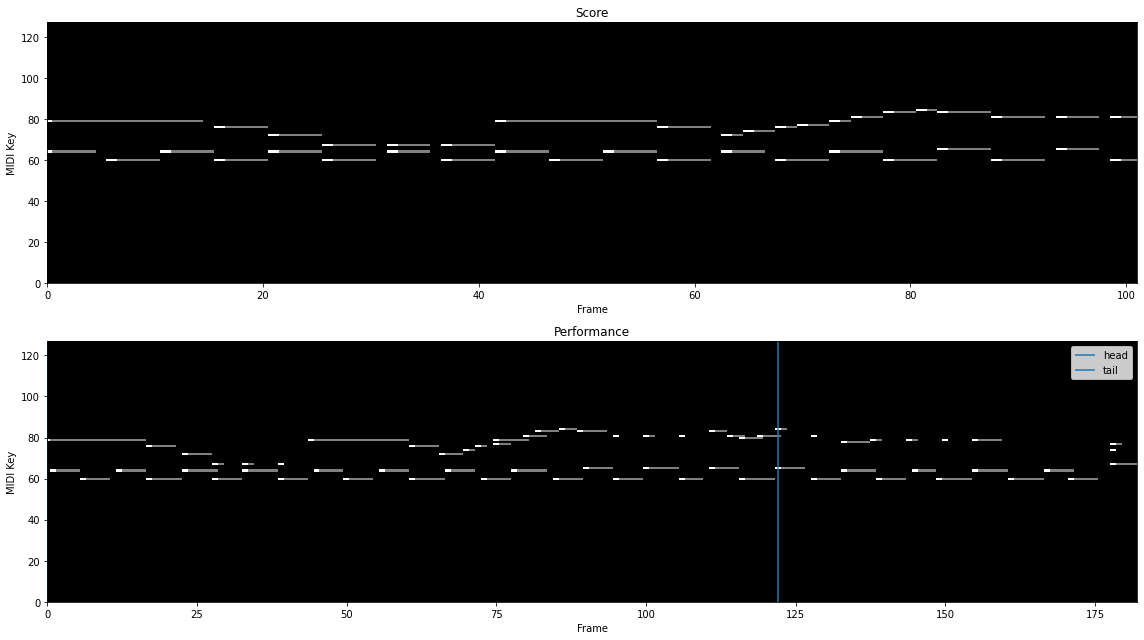

In [8]:
score_matrix, perf_matrix, (head, tail) = next(generator)
display(score_matrix, perf_matrix, head, tail)

In [9]:
score_without_decay = MIDIUnitSequenceList.from_midi_matrix(score_matrix)
print(score_without_decay)

[[Note(64, 2.00), Note(79, 2.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(79, 1.00)], [Note(60, 2.00), Note(79, 1.00)], [Note(60, 1.00), Note(79, 1.00)], [Note(60, 1.00), Note(79, 1.00)], [Note(60, 1.00), Note(79, 1.00)], [Note(60, 1.00), Note(79, 1.00)], [Note(64, 2.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00)], [Note(60, 2.00), Note(76, 2.00)], [Note(60, 1.00), Note(76, 1.00)], [Note(60, 1.00), Note(76, 1.00)], [Note(60, 1.00), Note(76, 1.00)], [Note(60, 1.00), Note(76, 1.00)], [Note(64, 2.00), Note(72, 2.00)], [Note(64, 1.00), Note(72, 1.00)], [Note(64, 1.00), Note(72, 1.00)], [Note(64, 1.00), Note(72, 1.00)], [Note(64, 1.00), Note(72, 1.00)], [Note(60, 2.00), Note(67, 2.00)], [Note(60, 1.00), Note(67, 1.00)], [Note(60, 1.00), Note(67, 1.00)], [Note(60, 1.00), Note(67, 1.00)], [Note(60, 1

In [10]:
settling_frame=5
decay_fn = get_decay_fn("linear", settling_frame=settling_frame)
score_with_decay = MIDIUnitSequenceList.from_midi_matrix(score_matrix, decay_fn)
print(score_with_decay)

[[Note(64, 4.00), Note(79, 4.00)], [Note(64, 3.00), Note(79, 3.00)], [Note(64, 2.00), Note(79, 2.00)], [Note(64, 1.00), Note(79, 1.00)], [Rest], [Rest], [Note(60, 4.00)], [Note(60, 3.00)], [Note(60, 2.00)], [Note(60, 1.00)], [Rest], [Note(64, 4.00)], [Note(64, 3.00)], [Note(64, 2.00)], [Note(64, 1.00)], [Rest], [Note(60, 4.00), Note(76, 4.00)], [Note(60, 3.00), Note(76, 3.00)], [Note(60, 2.00), Note(76, 2.00)], [Note(60, 1.00), Note(76, 1.00)], [Rest], [Note(64, 4.00), Note(72, 4.00)], [Note(64, 3.00), Note(72, 3.00)], [Note(64, 2.00), Note(72, 2.00)], [Note(64, 1.00), Note(72, 1.00)], [Rest], [Note(60, 4.00), Note(67, 4.00)], [Note(60, 3.00), Note(67, 3.00)], [Note(60, 2.00), Note(67, 2.00)], [Note(60, 1.00), Note(67, 1.00)], [Rest], [Rest], [Note(64, 4.00), Note(67, 4.00)], [Note(64, 3.00), Note(67, 3.00)], [Note(64, 2.00), Note(67, 2.00)], [Note(64, 1.00), Note(67, 1.00)], [Rest], [Note(60, 4.00), Note(67, 4.00)], [Note(60, 3.00), Note(67, 3.00)], [Note(60, 2.00), Note(67, 2.00)], [

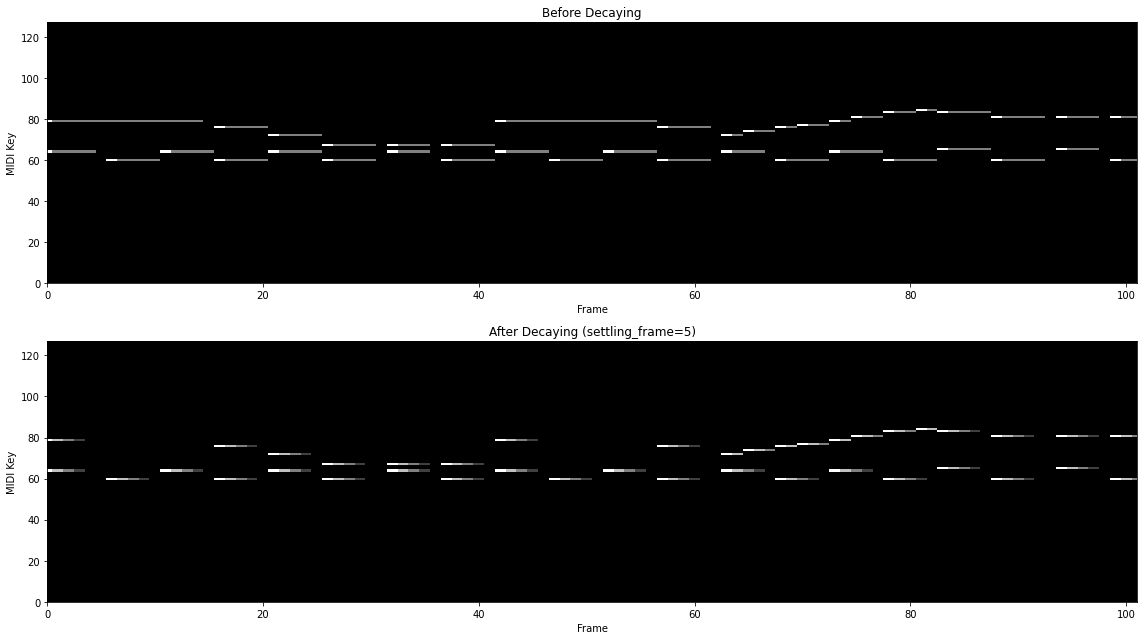

In [11]:
decayed_score_matrix = score_with_decay.to_midi_matrix(use_velocity=True)

plt.figure(figsize=(16, 9))

plt.subplot(2, 1, 1)
plt.title("Before Decaying")
plt.imshow(score_matrix, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
plt.ylabel("MIDI Key")
plt.xlabel("Frame")
ymax, xmax = score_matrix.shape
plt.ylim([0, ymax - 1])
plt.xlim([0, xmax - 1])

plt.subplot(2, 1, 2)
plt.title(f"After Decaying ({settling_frame=})")
plt.imshow(decayed_score_matrix, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
plt.ylabel("MIDI Key")
plt.xlabel("Frame")
ymax, xmax = decayed_score_matrix.shape
plt.ylim([0, ymax - 1])
plt.xlim([0, xmax - 1])

plt.tight_layout()
plt.show()